#0.Importamos las librerias

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos el dataset

In [2]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Machine Learning/7.Aplicando lo aprendido Parte I/Desafio/imdb_anime.xlsx")
df

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),Tanjiro heads to his next location southeast; ...,NaN,TV-14,NaN,3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24 min,(2019– ),Tanjiro gets separated from Zenitsu when he en...,NaN,TV-MA,NaN,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,2743,NaN,(1999– ),Carrot tells Sanji the news about Pedro. Germa...,"Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...",TV-14,NaN,2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),NaN,"Ogie Banks,Deborah Sale Butler,John DeMita,Ric...",Not Rated,NaN,NaN,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)


Descripcion de caracteristicas del dataset

● Title: Nombre de la animación

● Genre: Género(s) bajo el cual cae la animación, por ejemplo, Acción, Aventura, etc.

● User Rating: IMDb calificación de usuarios sobre 10.

● Number of Votes: Total de usuarios de IMDb que han calificado la animación.

● Runtime: Duración de la animación en minutos.

● Year: Año en que se estrenó o comenzó a emitirse la animación.

● Summary: Un resumen breve o completo de la trama de la animación. Resúmenes
completos se obtienen cuando están disponibles.

● Stars: Lista de actores principales o actores de voz involucrados en la animación.

● Certificate: Certificación de la animación, por ejemplo, PG, PG-13, etc.

● Metascore: Calificación de Metascore, si disponible, que es una puntuación agregada
de varios críticos.

● Gross: Ganancias brutas o recaudación en taquilla de la animación.

● Episode: Indicador binario si la lista es para un episodio de una serie (1 para sí, 0
para no).

● Episode Title: Título del episodio si la lista es para un episodio; de lo contrario, será None (Ninguno).
_

#1.Análisis de calidad de datos, EDA. 2.Transformación Inicial de Datos: las diferentes columnas que son datos de texto deben ser transformadas a numéricas para poder explorarlas de mejor forma. 3.Revision de outliers

In [3]:
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [4]:
print(f"El dataset cuenta con {df.shape} registros/columnas") #Dimensionalidad 45716
print("")
print(f"La cantidad de valores nulos por columna en el dataset son:\n{df.isna().sum()}") #Revision de nulos
print("")
print(f"Los tipos de datos por columa en el dataset son:\n{df.dtypes}")#Revision tipos de datos
print("")
print(f"La cantidad de registros duplicados en el dataset son:\n{df.duplicated().sum()}")#Revision tipos de datos

El dataset cuenta con (45717, 13) registros/columnas

La cantidad de valores nulos por columna en el dataset son:
Title                  0
Genre                  0
User Rating        20708
Number of Votes    20708
Runtime            13168
Year                 126
Summary            22170
Stars              32041
Certificate        17023
Metascore          45376
Gross              20708
Episode                0
Episode Title      10807
dtype: int64

Los tipos de datos por columa en el dataset son:
Title              object
Genre              object
User Rating        object
Number of Votes    object
Runtime            object
Year               object
Summary            object
Stars              object
Certificate        object
Metascore          object
Gross              object
Episode            object
Episode Title      object
dtype: object

La cantidad de registros duplicados en el dataset son:
874


Luego de esta primera revisión de aspectos basicos, podemos darnos cuenta que el dataset presenta bastantes valores nulos en muchas columnas, por lo que en la transformación de datos, definiremos las estrategias para abordar este problema, ya que si eliminamos los nulos, en promedio estariamos haciendo un drop de casi un 50% de la data.

Por otra parte, todas las columnas son del tipo string, a pesar de que algunas representan valores numericos, de fecha y/o booleanos, por lo que las transformaremos.

Tambien, haremos un drop de los duplicados encontrados

In [5]:
df = df.drop_duplicates()
print(f"El dataset luego del drop de duplicados, queda con {df.shape[0]} registros")

print("")
print("Revision de valores unicos por columna:")
print("")
cols = df.columns
for col in cols:
  print(f"Los valores unicos en la columna {col}: {df[col].nunique()}") #Revision de valores unicos por columna

El dataset luego del drop de duplicados, queda con 44843 registros

Revision de valores unicos por columna:

Los valores unicos en la columna Title: 9851
Los valores unicos en la columna Genre: 201
Los valores unicos en la columna User Rating: 87
Los valores unicos en la columna Number of Votes: 3033
Los valores unicos en la columna Runtime: 196
Los valores unicos en la columna Year: 740
Los valores unicos en la columna Summary: 22588
Los valores unicos en la columna Stars: 6460
Los valores unicos en la columna Certificate: 33
Los valores unicos en la columna Metascore: 60
Los valores unicos en la columna Gross: 3033
Los valores unicos en la columna Episode: 3
Los valores unicos en la columna Episode Title: 33779


En base a esta revision de valores unicos, debido a la naturaleza de varias columnas como titulo, genero, etc. es esperable tener una alta cantidad de valores distintos, sin embargo categorias que representan definiciones booleanas, como episode, se detectan 3 valores, debiendo ser solo 2, por lo que eliminaremos/transforemos los datos erróneos.

In [6]:
#Hacemos unas transformaciones y limpiezas preliminares antes de graficar las distribuciones

e_index = df.query("Episode == 'Episode'").index #Index valor erroneo en episode
df = df.drop(e_index,axis=0) #Dropeamos el index que tiene el valor erroneo

#======================GENRE======================================

df[["genre_1","genre_2","genre_3"]] = df["Genre"].str.split(", ",expand=True) #Dividimos genero en 3, para poder conservar estas caracteristicas y no dejarlas como un string completo y asi, reducimos la cantidad de valores unicos de 200, a 50
df = df.drop(columns="Genre")
df["genre_2"] = df["genre_2"].fillna("None") #Rellenamos los posibles nulos en la subcategoria 2
df["genre_3"] = df["genre_3"].fillna("None") #Rellenamos los posibles nulos en la subcategoria 3

#======================Episode Title, Stars y otros=====================================
df["Episode Title"] = df["Episode Title"].fillna("Complete Serie") # Rellenamos los nulos en episode title, indicando que es la serie completa
df["Stars"] = df["Stars"].fillna("No indicated")
df["Metascore"] = df["Metascore"].fillna("0")
df["Summary"] = df["Summary"].fillna("None")
df["Certificate"] = df["Certificate"].fillna("None")

#======================Runtime=====================================
df["Runtime"] = df["Runtime"].fillna("00 min") #Primero rellenamos los nulos, para luego poder calcular la mediana y asi rellenar correctamente denuevo imputando contra la mediana
minutes = df["Runtime"].str.split().str[0] #Separamos la cadena y nos quedamos con los minutos
df["runtime_mins"] = minutes #Creamos la columna
df['runtime_mins'] = df['runtime_mins'].str.replace(',', '').astype(int) #Transformamos a integer para calcular algunas metricas

run_mean = df['runtime_mins'].mean() #Calculamos la media, la cual es 24 mins
df['runtime_mins'].replace({00: run_mean}).astype(int) #Rellenamos los valores
df = df.drop(columns="Runtime")

Luego de una revision detenida sobre los nulos en la columna "User rating", se decide dropear esos registros, ya que en general al no tener evaluacion, no presentan datos en otras columnas y si a futuro queremos usar este dataset para hacer predicciones de evaluacion, no sirve imputar con valor 0 ya que afectaria medidas de tendencia central y otros estadisticos.

In [7]:
df = df.dropna(subset="User Rating")
print(f"El dataset luego del drop de nulos en user rating, queda con {df.shape[0]} registros")

new_names = {"Title": "title", "User Rating": "user_rating", "Number of Votes": "votes", "Year": "year",
"Summary": "summary", "Stars":"stars","Certificate": "certificate","Metascore":"metascore", "Gross":"recaudation","Episode":"episode",
             "Episode Title": "episode_title"}

df = df.rename(columns=new_names) #Renombramos las columnas para que esten de manera más ordenada

El dataset luego del drop de nulos en user rating, queda con 24183 registros


Continuamos con las transformaciones a variables numericas, como indica el punto 2

In [8]:
df['user_rating'] = df['user_rating'].astype(float)
df['votes'] = df['votes'].astype(int)
df['metascore'] = df['metascore'].astype(int)
df['recaudation'] = df['recaudation'].astype(int)
df['episode'] = df['episode'].astype(bool)


#=============================YEAR=====================================================================================
df['year'] = df['year'].str.replace(r'\(|\)', '') #Debemos aplicar la r para que reconozca los parentesis y los elimine
df["start_year"] = df["year"].str[:4] #Extraemos los 4 primero digitos, correspondientes al primer año
df = df.dropna(subset="start_year") #Dropeamos los registros que no tengan valores de año de inicio, ya que es una medida que si la imputamos, sería extraña.


#Debido a la existncia de valores anormales en los años extraidos y que estos mismos no permiten una correcta transformacion, los eliminaremos
patron = r'^\d{4}$' #Este patron con expresion regular busca 4 digitos consecutivos como ley
#Limpiamos las columnas con el patron
df["start_year"] = df["start_year"][df["start_year"].str.match(patron)]
df = df.dropna(subset=["start_year"]) #Dropeamos algunos valores que llegasén a crearse nulos luego de ejecutado el patron

df = df.drop(columns="year")#Dropeamos la columna de años que ya no usaremos

<ipython-input-8-557cd3ed1d9a>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['year'] = df['year'].str.replace(r'\(|\)', '') #Debemos aplicar la r para que reconozca los parentesis y los elimine
<ipython-input-8-557cd3ed1d9a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["start_year"] = df["start_year"][df["start_year"].str.match(patron)]


In [9]:
df #Df luego de realizadas todas estas transformaciones

,title,user_rating,votes,summary,stars,certificate,metascore,recaudation,episode,episode_title,genre_1,genre_2,genre_3,runtime_mins,start_year
0,One Piece,8.9,187689,Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,0,187689,False,Complete Serie,Animation,Action,Adventure,24,1999
3,Attack on Titan,9.1,434457,After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,0,434457,False,Complete Serie,Animation,Action,Adventure,24,2013
4,Jujutsu Kaisen,8.5,82909,A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,0,82909,False,Complete Serie,Animation,Action,Adventure,24,2020
5,Bleach: Thousand-Year Blood War,9.1,28587,The peace is suddenly broken when warning sire...,"Johnny Yong Bosch,Masakazu Morita,Stephanie Sh...",TV-MA,0,28587,False,Complete Serie,Animation,Action,Adventure,24,2022
6,Demon Slayer: Kimetsu no Yaiba,8.6,131667,A family is attacked by demons and only two me...,"Natsuki Hanae,Zach Aguilar,Abby Trott,Akari Kitô",TV-14,0,131667,False,Complete Serie,Animation,Action,Adventure,24,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Demon Slayer: Kimetsu no Yaiba,8.4,3375,With Tamayo coming to Nezuko's aid the battle ...,No indicated,TV-MA,0,3375,True,Together Forever,Animation,Action,Adventure,24,2019
45712,Demon Slayer: Kimetsu no Yaiba,7.3,3432,Tanjiro heads to his next location southeast; ...,No indicated,TV-14,0,3432,True,Tsuzumi Mansion,Animation,Action,Adventure,24,2019
45713,Demon Slayer: Kimetsu no Yaiba,7.9,3309,Tanjiro gets separated from Zenitsu when he en...,No indicated,TV-MA,0,3309,True,"The Boar Bares Its Fangs, Zenitsu Sleeps",Animation,Action,Adventure,24,2019
45714,One Piece,9.4,2743,Carrot tells Sanji the news about Pedro. Germa...,"Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...",TV-14,0,2743,True,Time for Farewell! Pudding's One Last Request!,Animation,Action,Adventure,0,1999


**Ahora que ya tenemos todas las variables limpias de nulos, transformadas, graficaremos su distribución para visualizar outliers y luego borrarlos, como indica el punto 3**

In [10]:
#Seleccionamos solo las columnas más relevantes a graficar
num_cols = df[["user_rating","votes","metascore","recaudation","runtime_mins"]]
cat_cols = df[["genre_1","genre_2","genre_3","start_year","episode"]]

In [11]:
def get_graph (df):
  fig,axs = plt.subplots(1,5,figsize=(25,6))

  for index, colname in enumerate(df.columns):
    if df[colname].dtypes in ["int64","float"]:
      mean = df[colname].mean()
      median = df[colname].median()

      plt.subplot(1,5,index+1)
      sns.boxplot(x=df[colname],data=df,ax=axs[index],flierprops=dict(marker='x', markersize=4, markerfacecolor='grey'),boxprops=dict(alpha=0.5))
      plt.axvline(mean,lw=0.5,ls="dashed",color="red",label=f"Mean: {round(mean,2)}")
      plt.axvline(median,lw=0.5,ls="dashed",color="darkorange",label=f"Median: {round(median,2)}")
      plt.title(f"{colname} distribution")
      plt.legend()

    else:
      plt.subplot(1,5,index+1)
      sns.countplot(x=df[colname],data=df,ax=axs[index],alpha=0.3,color="darkorange")
      plt.xticks(rotation=90)
      plt.title(f"{colname} distribution")
  plt.tight_layout()
  plt.show()

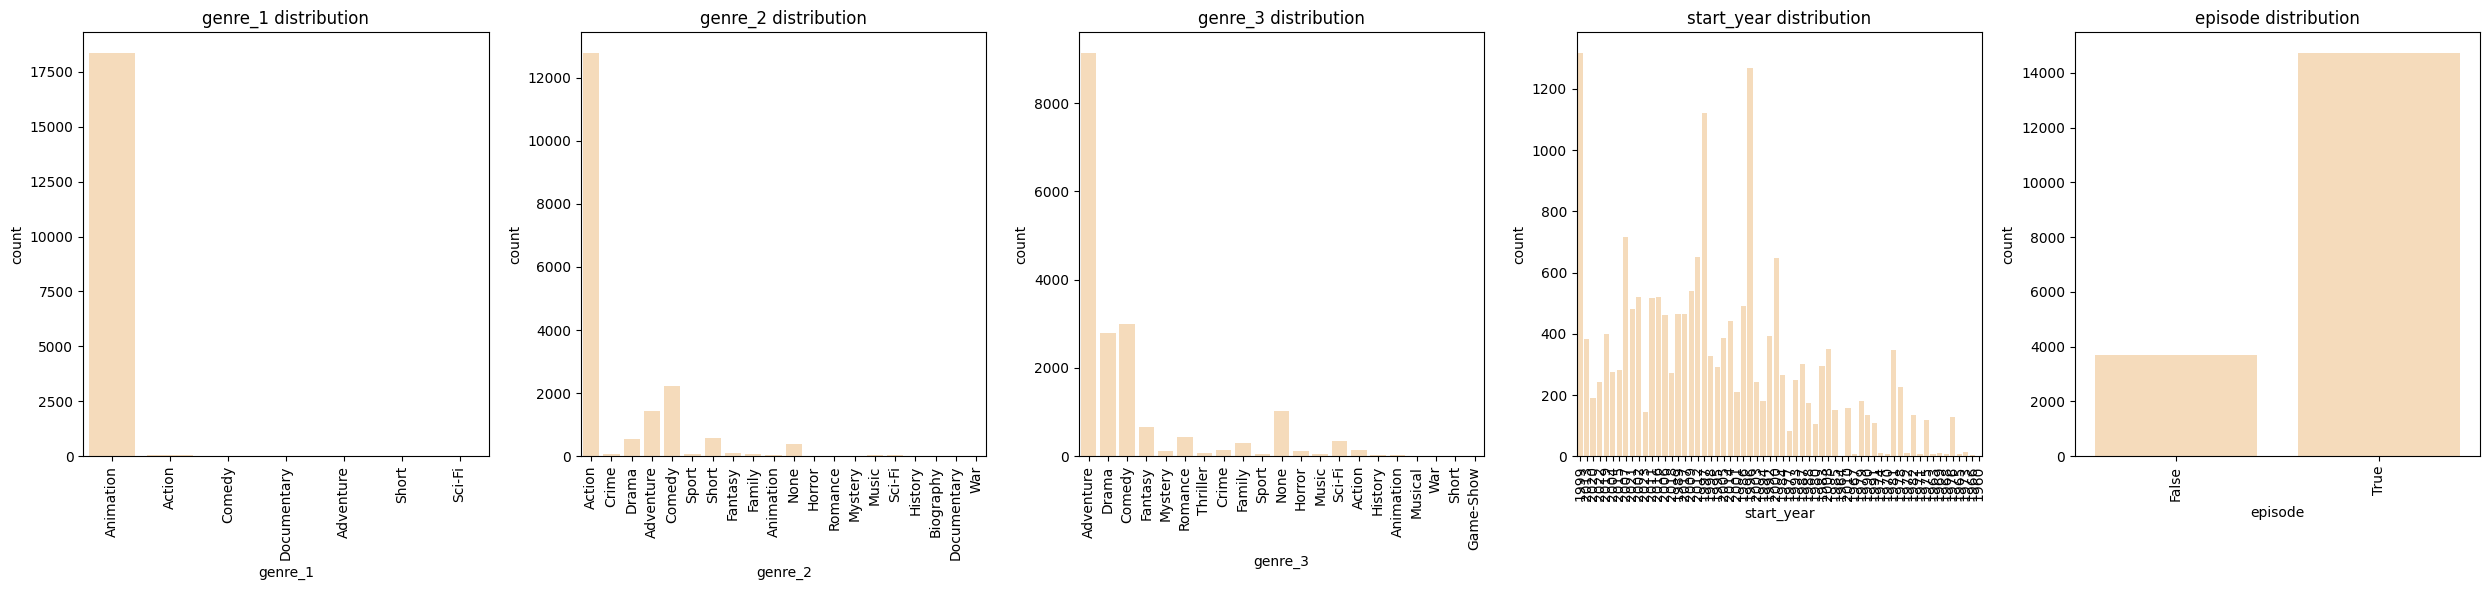

In [12]:
get_graph(cat_cols)

Visualizando las variable categoricas:
genre1 que asumimos que sería el genero principal del animé, tiene casi un 99% de la categoria animacion, luego en genre 2, un 70% de los anime contienen accion como su segundo genero principal y finalmente, en genre 3, un 50% de los animé contienen aventura.

Con respecto a los años, el año 1999 es que presenta más de 1300 registros, seguido del año 1996 con 1268 y 1997 con 1122 animés.

Finalmente casi un 80% de los datos revisados corresponden a episodios de un anime, y un 20 % asumiremos que se refieren a un review de la serie completa.

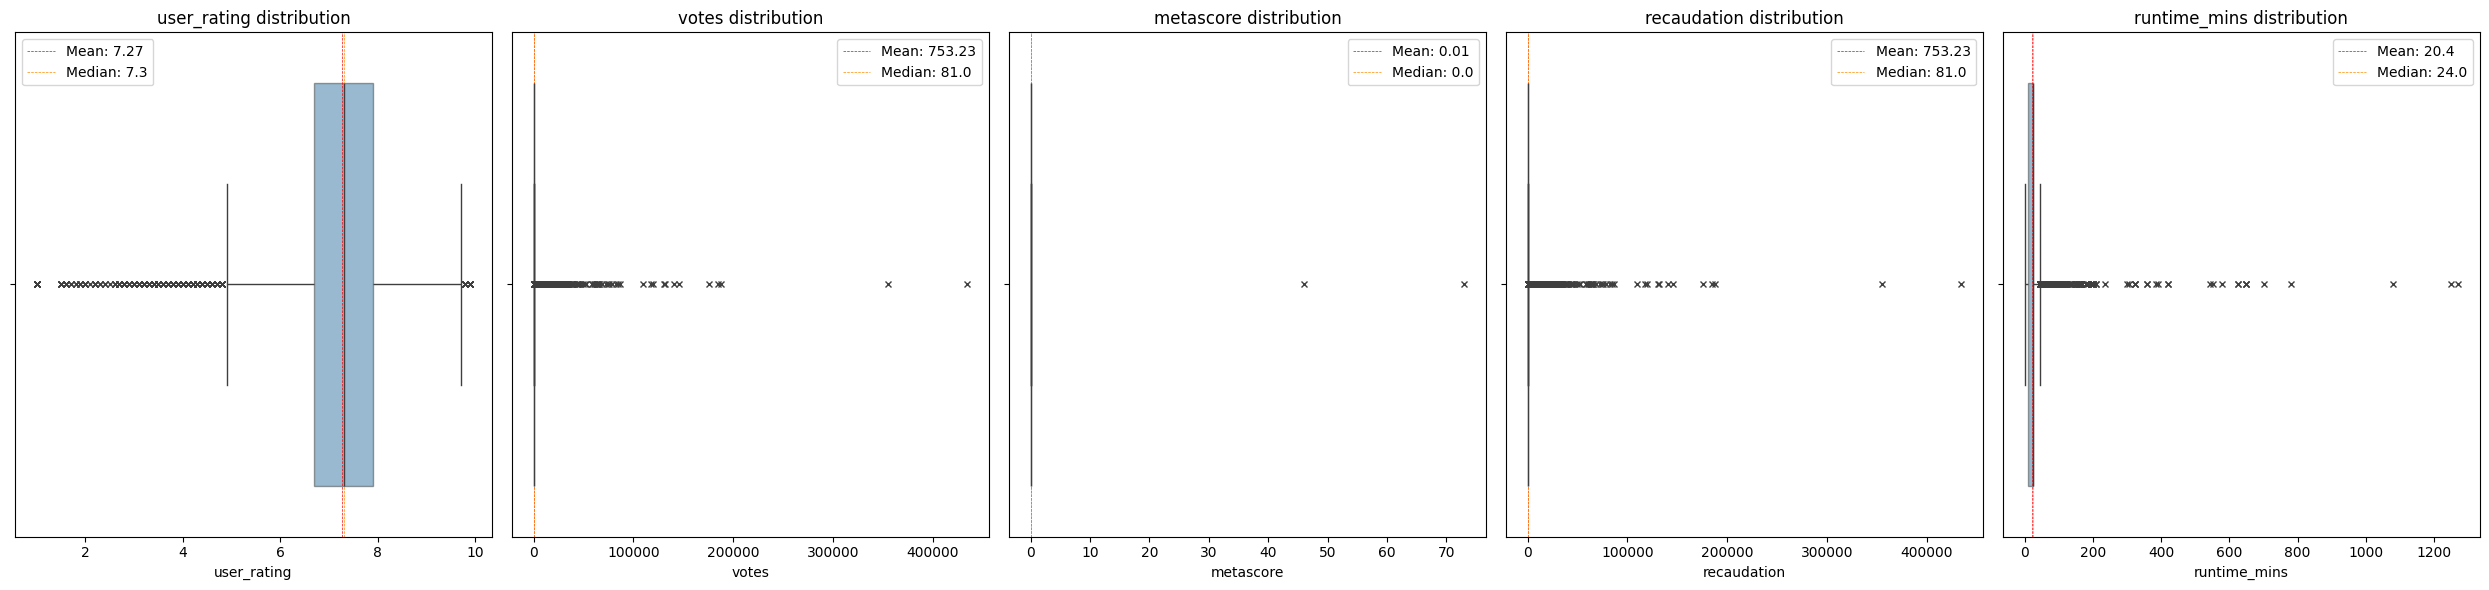

In [13]:
get_graph(num_cols)

Revisando los outliers de las columnas numericas, podemos ver que todas presentan muchos valores atipicos, los cuales afectan directamente a todos los estadisticos que podemos obtener de ellos, menos la mediana. Por lo que procederemos a limpiarlos

In [14]:
#Limpiamos los outliers através de IQR al ser un metodo más robusto y que no asume distribucion normal de las variables, como es en este caso
cols_to_clean = ["user_rating","votes","metascore","recaudation","runtime_mins"]

def clean_outliers (df,cols):
  df_clean = df.copy() #Primero hacemos una copia del df

  for column in cols: #Calculamos IQR para cada col
    Q1 = np.quantile(df[column],0.25)
    Q3 = np.quantile(df[column],0.75)
    IQR = Q3-Q1
    LOWER = (Q1 - 1.5 * IQR)
    UPPER =  (Q3 + 1.5 * IQR)

    df_clean = df_clean[(df_clean[column]>=LOWER)& (df_clean[column]<=UPPER)]

  return df_clean

df_clean = clean_outliers(df,cols_to_clean) #Aplicamos la funcion sobre las columnas que quermeos limpiar

old_shape = df.shape[0]
new_shape = df_clean.shape[0]
print(f"El dataset luego de la limpieza de outliers, pasó de {old_shape} registros a tener {new_shape}")

El dataset luego de la limpieza de outliers, pasó de 18444 registros a tener 15265


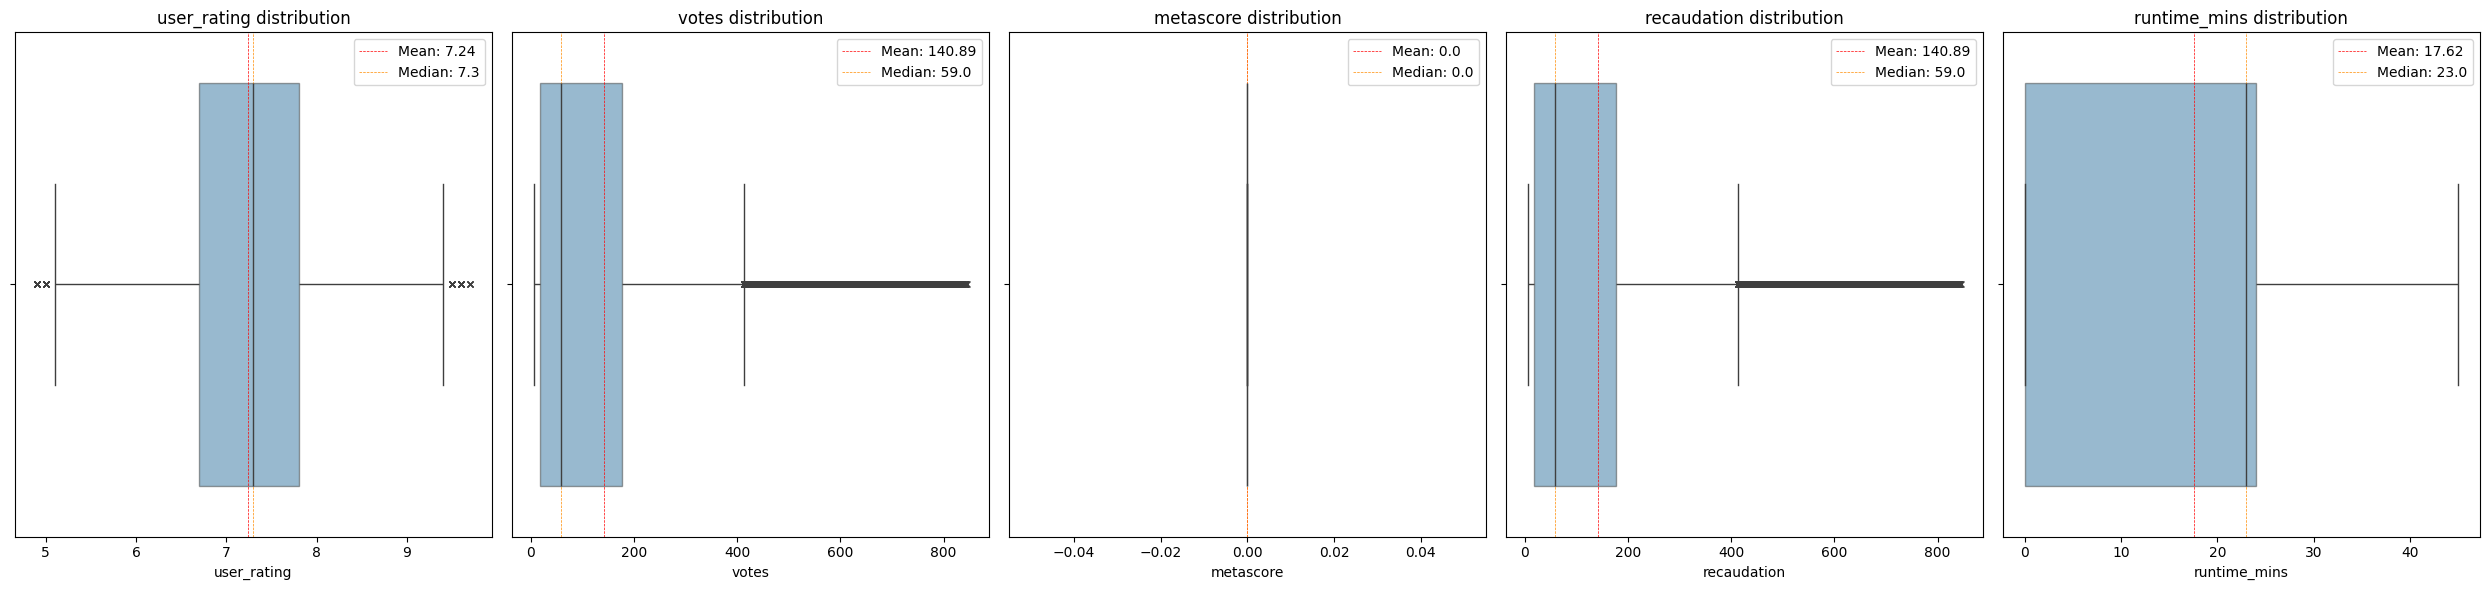

In [15]:
#Podemos visualizar las variables numericas luego de la limpieza
cols_clean = df_clean[["user_rating","votes","metascore","recaudation","runtime_mins"]]
get_graph(cols_clean)

La presencia de outliers y la distribucion misma de las variables mejoró considerablemente, por lo que continuaremos dropeando la columna metascore, ya que ya no presenta valores validos.

#4.Transformación de variables finales: realiza un pequeño análisis de distribuciones y transforma las variables aplicando transformaciones como logaritmo o get_dummies para extraer las diferentes categorías. Genera una estrategia para lidiar con los valores nulos y crea las variables que te parezcan necesarias.

Como ya revisamos las distribuciones arriba y tambien ya transformamos o dropeamos los nulos y creamos otras variables necesarias, solo queda aplicar dummies

In [16]:
df_clean = df_clean.drop(columns="metascore")
#Seleccionaremos solo episode y genre_1 para transformlas a booleanas ya que el resto, o son numericas o simplemente contienen un numero excesivo de valores unicos, lo que aumentaria sin razon logica la dimensionalidad del dataset
df_dummies = pd.get_dummies(data=df_clean,columns=["episode","genre_1"])
df_dummies.head()

,title,user_rating,votes,summary,stars,certificate,recaudation,episode_title,genre_2,genre_3,runtime_mins,start_year,episode_False,episode_True,genre_1_Action,genre_1_Adventure,genre_1_Animation,genre_1_Comedy,genre_1_Documentary,genre_1_Short
129,Mech Cadets,6.8,497,An underdog teen joins a group of young Cadets...,"Brandon Soo Hoo,Aparna Brielle,Victoria Grace,...",TV-Y7,497,Complete Serie,Action,Adventure,25,2023,1,0,0,0,1,0,0,0
196,Rurouni Kenshin,8.3,529,"During the violent era known as the Bakumatsu,...","Rie Takahashi,Sôma Saitô,Makoto Koichi,Taku Ya...",TV-MA,529,Complete Serie,Action,Adventure,24,2023,1,0,0,0,1,0,0,0
215,Ooku: The Inner Chambers,7.5,628,In an alternate history where the male populat...,"James Simenc,Steve Blum,Cindy Robinson,Trevor ...",TV-MA,628,Complete Serie,Drama,Fantasy,30,2023,1,0,0,0,1,0,0,0
228,Pokémon Horizons,8.1,279,"Liko, whose partner Pokémon is Sprigatito, and...","Minori Suzuki,Megumi Hayashibara,Daiki Yamashi...",TV-Y7,279,Complete Serie,Action,Adventure,24,2023,1,0,0,0,1,0,0,0
270,Undead Murder Farce,7.6,224,"In a world inhabited by vampires, golems, were...","Taku Yashiro,Tomoyo Kurosawa,Makoto Koichi,Say...",None,224,Complete Serie,Drama,Fantasy,0,2023,1,0,0,0,1,0,0,0


#5.Análisis de Correlaciones

<ipython-input-18-6b44a7a445cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df_dummies.corr(method="pearson") #Calculamos la correlacion de pearson


<Axes: >

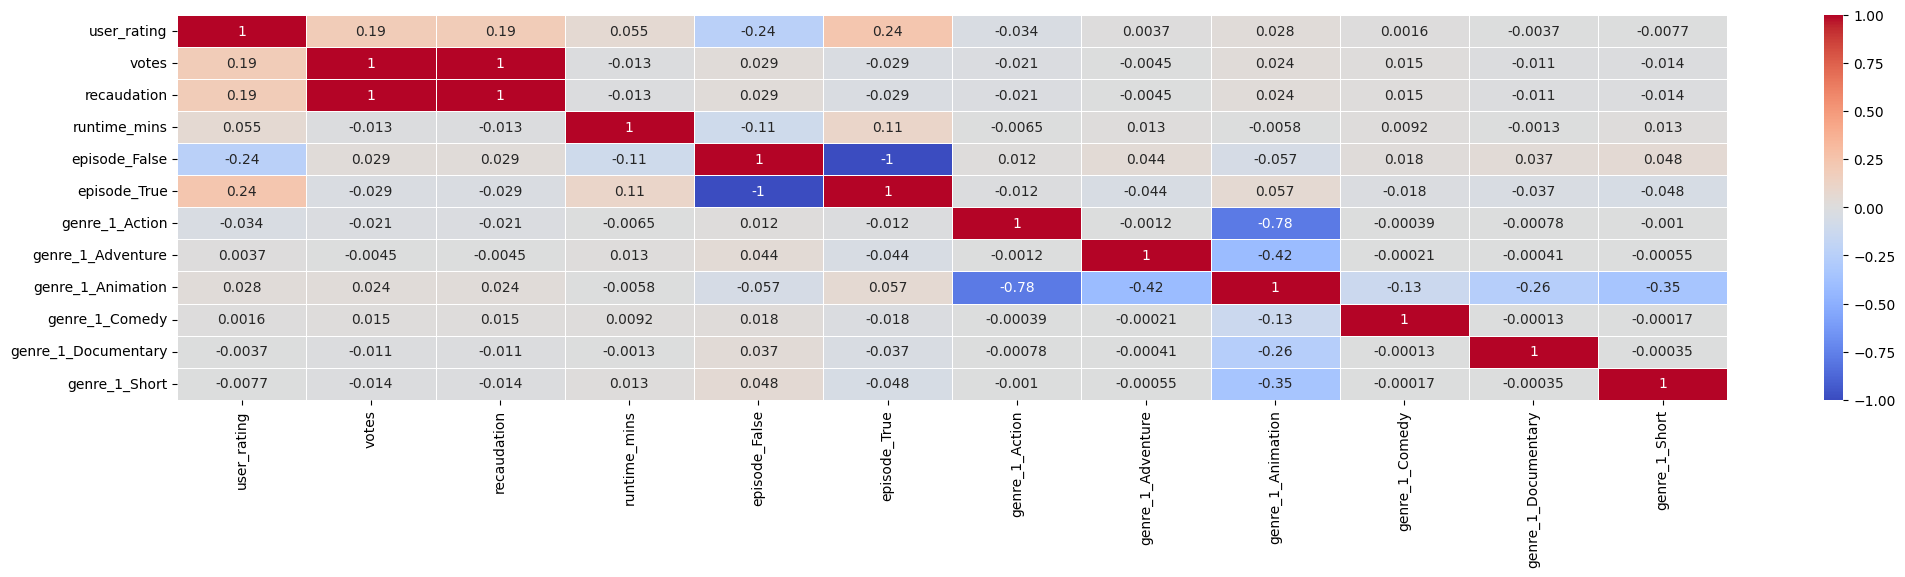

In [18]:
pearson_corr = df_dummies.corr(method="pearson") #Calculamos la correlacion de pearson
#Visualizamos

plt.figure(figsize=(25,5))
sns.heatmap(pearson_corr,annot=True,cmap="coolwarm",linewidth=.7)

Asumiendo que la variable objetivo sería el user_rating, podemos ver que las correlaciones detectadas entre variables numericas, no son lo suficientemente potentes, sin embargo si hay correlaciones positivas entre el rating con el numero de votos, con su recaudacion, y si el "review" es de un episodio o no, siendo influyente positivamente si episodio = True. Por lo tanto, estas variables si podrian ser consideradas estadisticamentes signficativas como para poder predecir rating, pero probablemente no logren explicar toda la variabilida de ella.

#6.Genera una función que resuma todo el procesamiento necesario para el dataset, que lea el dataset original y entregue un dataset ya tratado.

Importante indicar que para este punto, es imposible generar una funcion generica que limpie y transforme el dataset, ya que cada dataset tiene caracteristicas de registros y columnas distintas y que no necesariamente siguen una estructura global lógica, por lo que el preprocesamiento si o si debe ser personalizado, sin embargo podemos crear una funcion que entregue un dataset libre de nulos y outliers

Durante el desarrollo del desafio se aplicaron distintas funciones que limpian el dataset e incluso para graficarlo, por lo que para no hacer reiterativo el codigo, no se escribirán acá ya que ya se usaron arriba

#7.A partir de las columnas que obtuviste realiza una selección de variables según los siguientes métodos: Filtros basados en correlaciones y forward selection y compara.

In [64]:
#Como probaremos con una regresion lineal, ya que el target es numerico, debemos dropear las columnas de tipo object
df_dummies["start_year"] = df_dummies["start_year"].astype(int)
X=df_dummies[["votes","recaudation","runtime_mins","start_year","episode_False","episode_True","genre_1_Action","genre_1_Adventure","genre_1_Animation","genre_1_Comedy","genre_1_Documentary","genre_1_Short"]]
y= df_dummies["user_rating"]

In [80]:
#Filtros basados en correlaciones

corr_matrix = df_dummies.corr().abs() #Calculamos la matriz de correlacion
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].drop(column) > 0.5)]
#aqui definimos un umbral de 0.5

#Eliminamos las caracteristicas altamente correlacionadas
filtered_data = df_dummies.drop(to_drop, axis=1)

print("Características eliminadas:")
print(to_drop)
print("")

print("Características después del filtrado por correlaciones:")
print(filtered_data.columns)


Características eliminadas:
['recaudation', 'episode_True', 'genre_1_Animation']

Características después del filtrado por correlaciones:
Index(['title', 'user_rating', 'votes', 'summary', 'stars', 'certificate',
       'episode_title', 'genre_2', 'genre_3', 'runtime_mins', 'start_year',
       'episode_False', 'genre_1_Action', 'genre_1_Adventure',
       'genre_1_Comedy', 'genre_1_Documentary', 'genre_1_Short'],
      dtype='object')


<ipython-input-80-55b41266166b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_dummies.corr().abs() #Calculamos la matriz de correlacion


Como vimos anteriormente, ya que casi todas las variables presentan correlaciones bajas, por lo que aplicar un filtro a través del umbral, no termina siendo efectivo a menos que se disminuya mucho el umbral

In [87]:
#Fordward Selection

model = LinearRegression() #Instanciamos un modelo
sfs = SequentialFeatureSelector(model, n_features_to_select = 5, direction="forward",scoring="r2",cv=5)
sfs.fit(X,y)

selected_features = X.columns[sfs.support_]
print("Características seleccionadas por Forward Selection:")
print(selected_features)

Características seleccionadas por Forward Selection:
Index(['votes', 'recaudation', 'episode_True', 'genre_1_Action',
       'genre_1_Short'],
      dtype='object')


Aplicamos un fordward selection, utilizando el score del coeficiente de determinacion r2 y los resultados luego de varias pruebas solo indican que ya que uno le indica cuantas features requiere, el algoritmo literal va a entregarte ese mismo numero, aunque no tengan un puntaje r2 alto, hasta llegar a n-1 features que es el tope. Sin embargo, lo bueno es que las entrega en order de acuerdo a la puntuación r2 y además, como se testea sobre un modelo ajustado, es mucho más confiable que hacer una seleccion directa por correlación ya que esta si está aplicando internamente calculo de coeficientes.